In [ ]:
https://m.blog.naver.com/laonple/220527647084

In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from matplotlib import font_manager, rc
import warnings

warnings.simplefilter("ignore")
font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

-1.0
-1.0


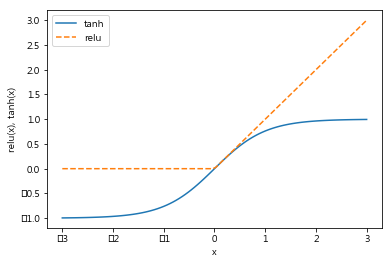

In [22]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label = "tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label='relu')
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
print(np.tanh(-100))
print(np.tanh(-1000000))

Text(0,0.5,'특성1')

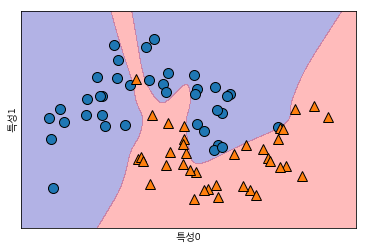

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y= make_moons(n_samples =100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#Solver:sgd, adam, lbfgs.
#Activation: identify(항등-회귀), logistic, tanh, relu =기본값.
mlp = MLPClassifier(solver='lbfgs',activation="logistic" ,random_state=0).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.xlabel("특성0")
plt.ylabel("특성1")

Text(0,0.5,'특성1')

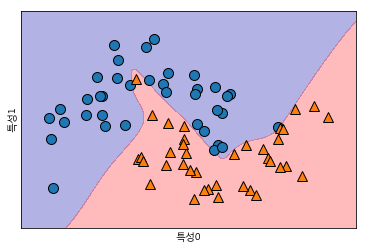

In [27]:
mlp = MLPClassifier(solver='lbfgs',activation="logistic" ,random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성0")
plt.ylabel("특성1")

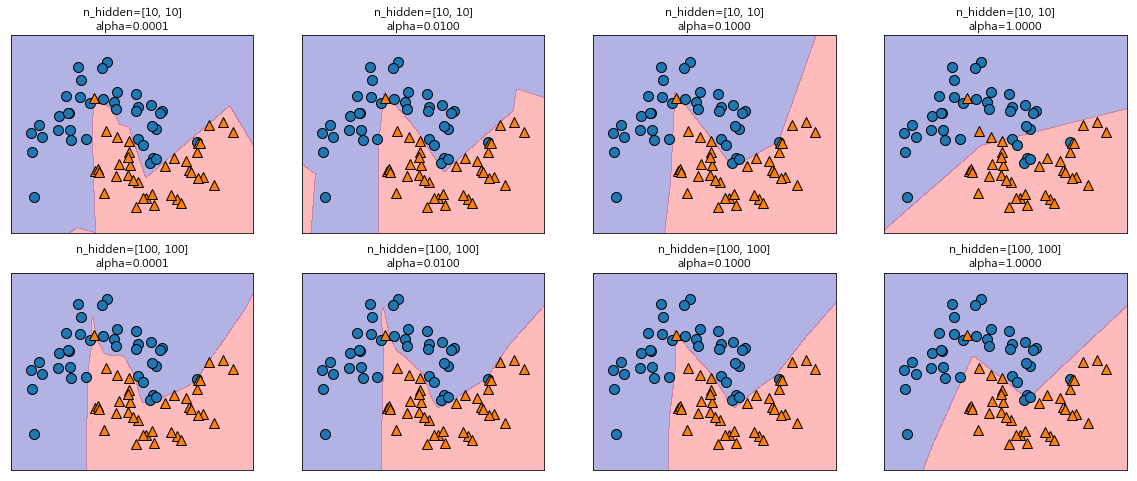

In [28]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최댓값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최댓값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [65]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.91
테스트 세트 정확도: 0.88


In [43]:
# 훈련 세트 각 특성의 평균을 계산합니다.
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다.
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다.
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


In [46]:
print(mlp.n_layers_)
print(mlp.n_outputs_)
print(mlp.out_activation_)
print(mlp.loss_)
print(mlp.coefs_)
print(mlp.n_iter_)

3
1
logistic
0.025537106880942906
[array([[ 0.0431555 ,  0.06790558,  0.10523055, ..., -0.21713903,
         0.09977192, -0.15232705],
       [ 0.13016912, -0.25402541,  0.1143343 , ..., -0.18539026,
        -0.26517141, -0.28361121],
       [-0.06108265,  0.05675976,  0.00733581, ...,  0.14347429,
         0.16171513,  0.24496962],
       ...,
       [-0.11431418,  0.0362903 ,  0.18259133, ...,  0.06009745,
         0.1109276 , -0.07967906],
       [-0.03054833, -0.0373082 , -0.10530772, ..., -0.05035889,
         0.1354161 , -0.10762752],
       [-0.28182869, -0.16381196,  0.17502098, ..., -0.1381569 ,
         0.07524813, -0.11525498]]), array([[-2.37139146e-01],
       [ 3.06265273e-01],
       [-2.48678379e-01],
       [ 3.10409086e-01],
       [ 1.79809697e-01],
       [-1.14069216e-01],
       [ 1.60503396e-01],
       [ 1.24741572e-01],
       [ 4.76646763e-01],
       [-3.30396309e-01],
       [-1.80580047e-01],
       [ 2.19646277e-01],
       [-2.48007461e-01],
       [ 2.70

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

mlp = MLPClassifier(hidden_layer_sizes=[30,30,50], alpha=0.0001, solver='lbfgs', activation="logistic", max_iter=100000)

In [48]:
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[46  7]
 [ 3 87]]


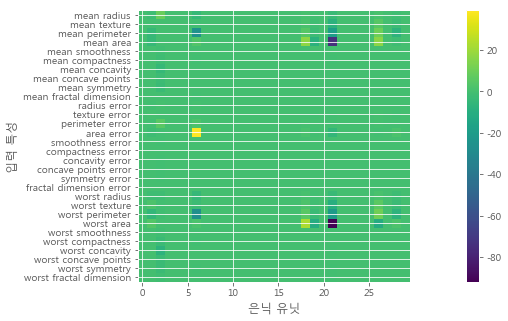

In [53]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

In [92]:
wine = pd.read_csv("./wine_data.csv", names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
              "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
              "Falvanoids", "Nonflavanoid_phenols",
              "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"], encoding="utf-8")
print (wine.head()) 

   Cultivator  Alchol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0           1   14.23        1.71  2.43               15.6        127   
1           1   13.20        1.78  2.14               11.2        100   
2           1   13.16        2.36  2.67               18.6        101   
3           1   14.37        1.95  2.50               16.8        113   
4           1   13.24        2.59  2.87               21.0        118   

   Total_phenols  Falvanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2    

In [101]:
X = wine.drop('Cultivator', axis=1)
y = wine['Cultivator']
print(y.unique())

[1 2 3]


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [111]:
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30))
mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[ 0 17  0]
 [ 0 21  0]
 [ 0  7  0]]


In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [115]:
print(mlp.coefs_[0].shape)

(13, 30)


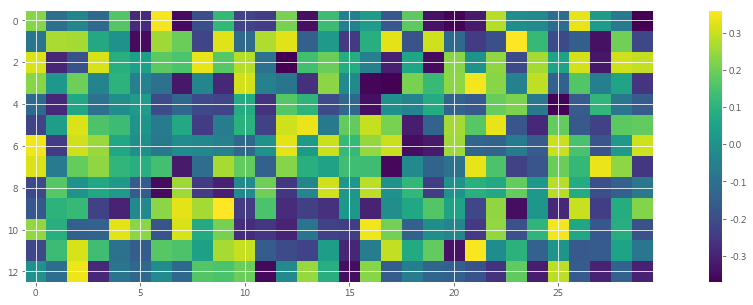

In [118]:
plt.figure(figsize=(20,5 ))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.colorbar()

In [137]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("혼동행렬의 정규화")
    else:
        print("정규화하지 않은 혼동행렬")
    print(cm)
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],fmt),
                 horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
                 
    plt.tight_layout()

혼동행렬의 정규화
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


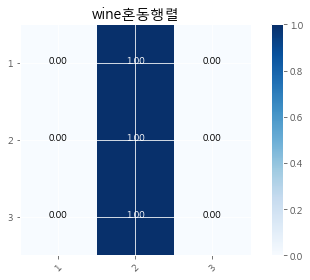

In [138]:
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=y.unique(), title='wine혼동행렬', normalize=True)

plt.show()

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

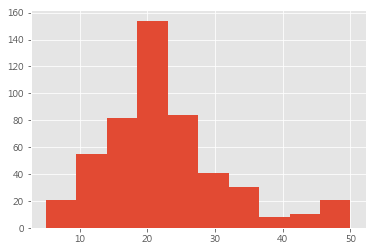

In [139]:
from sklearn.datasets import load_boston
data = load_boston()
plt.hist(data.target)

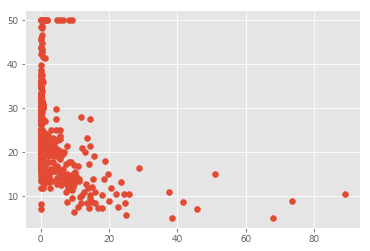

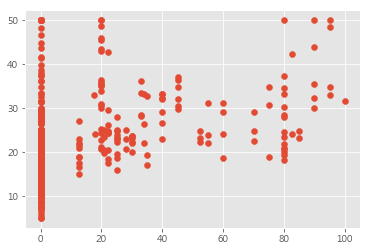

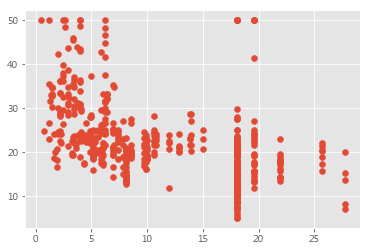

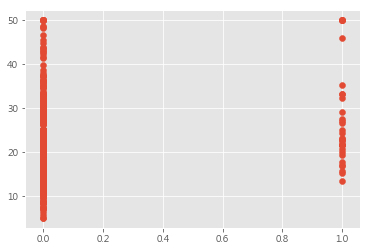

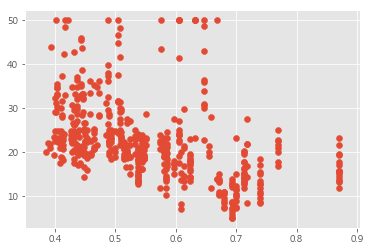

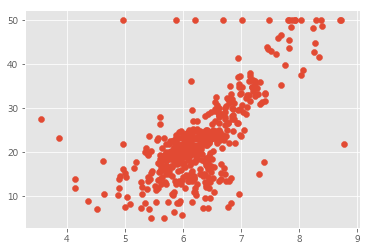

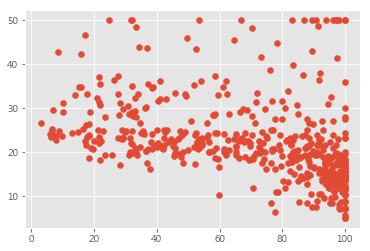

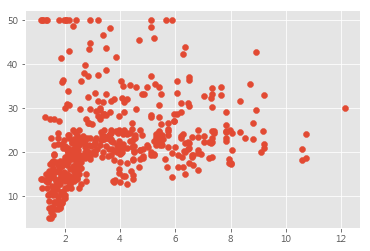

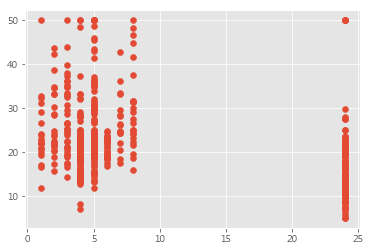

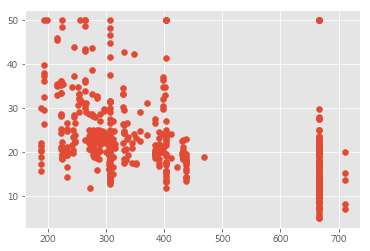

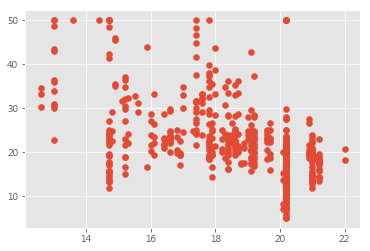

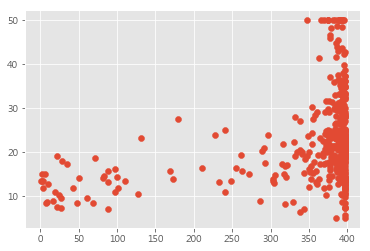

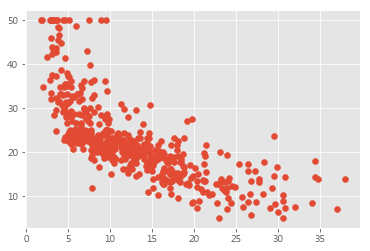

In [141]:
for index, feature_name in enumerate(data.feature_names):
    plt.figure()
    plt.scatter(data.data[:,index], data.target)

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test
print("RMS: %s" % np.sqrt(np.mean((predicted - expected) **2 )))

RMS: 4.08990743127132


In [145]:
from sklearn.neural_network import MLPRegressor
X, y = load_boston(return_X_y=True)

half_n_samples = int(len(X) / 2)
X_1, X_2, y_1, y_2 = (X[:half_n_samples], X[half_n_samples:],y[:half_n_samples], y[half_n_samples:])

for random_state in [None, 3]:
    for warm_start in [False, True]:
        print("\nwarm_start:", warm_start, '\nrandom_state:', random_state)
        model = MLPRegressor(warm_start=warm_start, random_state=random_state)
        model.fit(X_1, y_1)
        weights_1 = model.coefs_
        print("첫번째 coef_:\n", model.coefs_[0][0][:10])
        model.fit(X_2, y_2)
        print("두번째 coef_:\n", model.coefs_[0][0][:10])


warm_start: False 
random_state: None
첫번째 coef_:
 [-1.06e-01  1.58e-01  2.18e-05 -2.24e-03  7.20e-02  1.40e-01  9.93e-08
 -1.92e-01 -9.49e-02 -1.25e-01]
두번째 coef_:
 [-0.15 -0.13  0.03 -0.2  -0.12  0.19  0.21  0.12 -0.1   0.04]

warm_start: True 
random_state: None
첫번째 coef_:
 [-0.15  0.07 -0.22 -0.15 -0.19 -0.03  0.06 -0.07  0.1  -0.02]
두번째 coef_:
 [-0.15  0.07 -0.22 -0.16 -0.19 -0.03  0.06 -0.07  0.1  -0.02]

warm_start: False 
random_state: 3
첫번째 coef_:
 [ 0.04  0.08 -0.08  0.02  0.2   0.16 -0.19 -0.15 -0.23 -0.04]
두번째 coef_:
 [ 0.04  0.08 -0.08  0.02  0.2   0.17 -0.19 -0.15 -0.22 -0.04]

warm_start: True 
random_state: 3
첫번째 coef_:
 [ 0.04  0.08 -0.08  0.02  0.2   0.16 -0.19 -0.15 -0.23 -0.04]
두번째 coef_:
 [ 0.04  0.08 -0.08  0.02  0.2   0.17 -0.19 -0.15 -0.22 -0.04]


In [180]:
from sklearn.model_selection import GridSearchCV
train_size =100
model = MLPRegressor(warm_start="True", random_state=3)
model_cv = GridSearchCV(model, cv=5, param_grid={"solver": ["relu", "tanh", "logistic","identity"],
                                                "solver": ["lbfgs","sgd","adam"],
                                                "alpha":[0.0001,0.001,0.01,0.1,1]})

model_cv.fit(X,y)
print("모델 계수", model_cv.best_estimator_)

모델 계수 MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start='True')


Epoch: 100; Error: 0.24452900989002702;
Epoch: 200; Error: 0.024767705453394073;
Epoch: 300; Error: 0.018540700036602308;
Epoch: 400; Error: 0.017855494079352607;
Epoch: 500; Error: 0.016902524296124256;
Epoch: 600; Error: 0.01563599593537477;
Epoch: 700; Error: 0.013648463873597453;
The goal of learning is reached


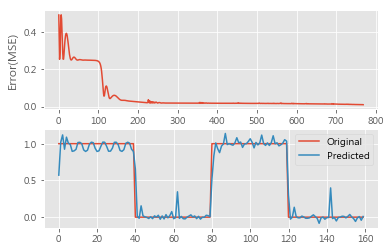

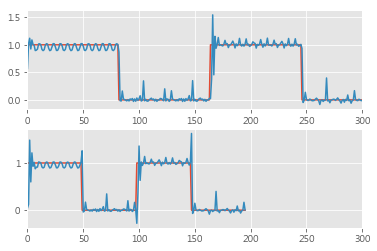

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

def get_data(num_points):
    wave_1 = 0.5 * np.sin(np.arange(0, num_points))
    wave_2 = 3.6 * np.sin(np.arange(0, num_points))
    wave_3 = 1.1 * np.sin(np.arange(0, num_points))
    wave_4 = 4.7 * np.sin(np.arange(0, num_points))
    
    amp_1 = np.ones(num_points)
    amp_2 = np.zeros(num_points)
    amp_3 = np.ones(num_points)
    amp_4 = np.zeros(num_points)
    
    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
    amp = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(num_points * 4, 1)
    
    return wave, amp

def visualize_output(nn, num_points_test):
    wave, amp = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test * 4))
    plt.plot(output.reshape(num_points_test * 4))
    
if __name__ == '__main__':
    num_points=40
    wave, amp = get_data(num_points)
    nn = nl.net.newelm([[-2, 2]], [10,1], [nl.trans.TanSig(), nl.trans.PureLin()])
    
    nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    nn.init()
    
    error_progress = nn.train(wave, amp, epochs= 1200, show = 100, goal=0.01)
    output = nn.sim(wave)
    
    plt.subplot(211)
    plt.plot(error_progress)
    plt.xlabel('Number of epochs')
    plt.ylabel('Error(MSE)')
    
    plt.subplot(212)
    plt.plot(amp.reshape(num_points *4))
    plt.plot(output.reshape(num_points *4))
    plt.legend(['Original', 'Predicted'])
    
     # Testing the network performance on unknown data 
    plt.figure()

    plt.subplot(211)
    visualize_output(nn, 82)
    plt.xlim([0, 300])

    plt.subplot(212)
    visualize_output(nn, 49)
    plt.xlim([0, 300])

    plt.show()

In [194]:
import numpy as np
import neurolab as nl

# Define the input file
input_file = 'letter.data'

# Define the number of datapoints to 
# be loaded from the input file
num_datapoints = 100

# String containing all the distinct characters
orig_labels = 'omandig'

# Compute the number of distinct characters
num_orig_labels = len(orig_labels)

# Define the training and testing parameters
num_train = int(0.9 * num_datapoints)
num_test = num_datapoints - num_train

# Define the dataset extraction parameters 
start = 6
end = -1

# Creating the dataset
data = []
labels = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Split the current line tabwise
        list_vals = line.split('\t')

        # Check if the label is in our ground truth 
        # labels. If not, we should skip it.
        if list_vals[1] not in orig_labels:
            continue

        # Extract the current label and append it 
        # to the main list
        label = np.zeros((num_orig_labels, 1))
        label[orig_labels.index(list_vals[1])] = 1
        labels.append(label)

        # Extract the character vector and append it to the main list
        cur_char = np.array([float(x) for x in list_vals[start:end]])
        data.append(cur_char)

        # Exit the loop once the required dataset has been created 
        if len(data) >= num_datapoints:
            break

# Convert the data and labels to numpy arrays
data = np.asfarray(data)
labels = np.array(labels).reshape(num_datapoints, num_orig_labels)

# Extract the number of dimensions
num_dims = len(data[0])

# Create a feedforward neural network
nn = nl.net.newff([[0, 1] for _ in range(len(data[0]))], 
        [128, 16, num_orig_labels])

# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

# Train the network
error_progress = nn.train(data[:num_train,:], labels[:num_train,:], 
        epochs=10000, show=100, goal=0.01)

# Predict the output for test inputs 
print('\n 테스팅 :')
predicted_test = nn.sim(data[num_train:, :])
for i in range(num_test):
    print('\n원본 :', orig_labels[np.argmax(labels[i])])
    print('예측 :', orig_labels[np.argmax(predicted_test[i])])

Epoch: 100; Error: 269.8403493521352;
Epoch: 200; Error: 269.618010548572;
Epoch: 300; Error: 269.88939731745404;
Epoch: 400; Error: 269.9894308186438;
Epoch: 500; Error: 269.98691463568434;
Epoch: 600; Error: 269.9826765458281;
Epoch: 700; Error: 269.97402634536854;
Epoch: 800; Error: 269.9450171626109;
Epoch: 900; Error: 244.86487619778984;
Epoch: 1000; Error: 269.92890768137295;
Epoch: 1100; Error: 269.94452470042427;
Epoch: 1200; Error: 269.9141467004035;
Epoch: 1300; Error: 269.9735779299526;
Epoch: 1400; Error: 269.9445616511932;
Epoch: 1500; Error: 269.93942643543386;
Epoch: 1600; Error: 265.65816138591975;
Epoch: 1700; Error: 268.8750789927094;
Epoch: 1800; Error: 243.76889064046804;
Epoch: 1900; Error: 145.878184329004;
Epoch: 2000; Error: 125.04906369264233;
Epoch: 2100; Error: 142.8584707085654;
Epoch: 2200; Error: 69.64159064496177;
Epoch: 2300; Error: 65.62910907389757;
Epoch: 2400; Error: 25.54986498505439;
Epoch: 2500; Error: 20.48431220109062;
Epoch: 2600; Error: 21.021